In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')


# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
#df_uk_2008_2012.dtypes
df_uk_2008_2012.head()

C:\Users\justi\AppData\Local\Temp\ipykernel_15148\1636884792.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
218,2008-01-01,9881.75,5488.98,5.375000,2.2,3063.34,3624.20,100.549835,162.975,-13.0,107.04213,171.504,106.201720,781.964,5.2,3.8,0.5,-0.007201
219,2008-02-01,10067.93,5594.87,5.250000,2.5,3073.00,3648.14,101.080590,163.862,-17.0,106.70992,171.740,105.680695,781.502,5.2,3.6,0.5,0.045560
220,2008-03-01,10013.24,5581.66,5.125000,2.5,2988.28,3577.41,101.260895,164.798,-19.0,107.05124,173.050,105.604810,784.100,5.3,4.1,-0.5,0.175849
221,2008-04-01,10122.28,5679.93,5.000000,3.0,3167.22,3804.06,100.688210,164.468,-24.0,104.64431,169.940,103.380400,771.036,5.2,4.6,-0.5,0.175849
222,2008-05-01,10049.34,5657.73,4.916667,3.3,3148.94,3796.33,100.018920,164.014,-29.0,102.24722,166.786,101.111850,757.380,5.4,4.7,-0.5,-0.010290


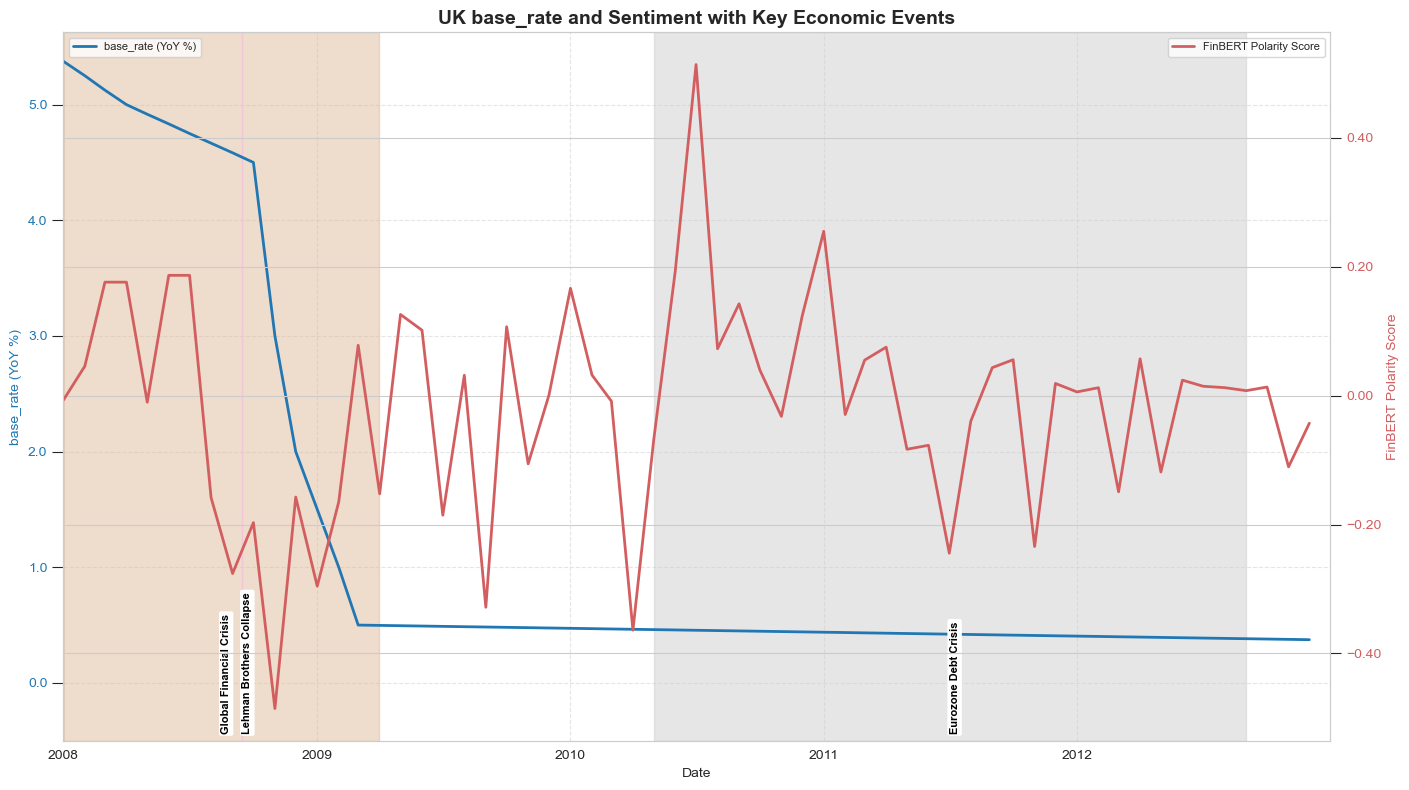

In [6]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

* From 2008 to early 2009, the base rate dropped steeply from above 5% to near 0.5%.
* It remained flat at around 0.5% for several years through 2012.
* The Bank of England responded to the 2008 financial crisis with aggressive rate cuts to stimulate the economy.

### Visual analysis shows that BoE base rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

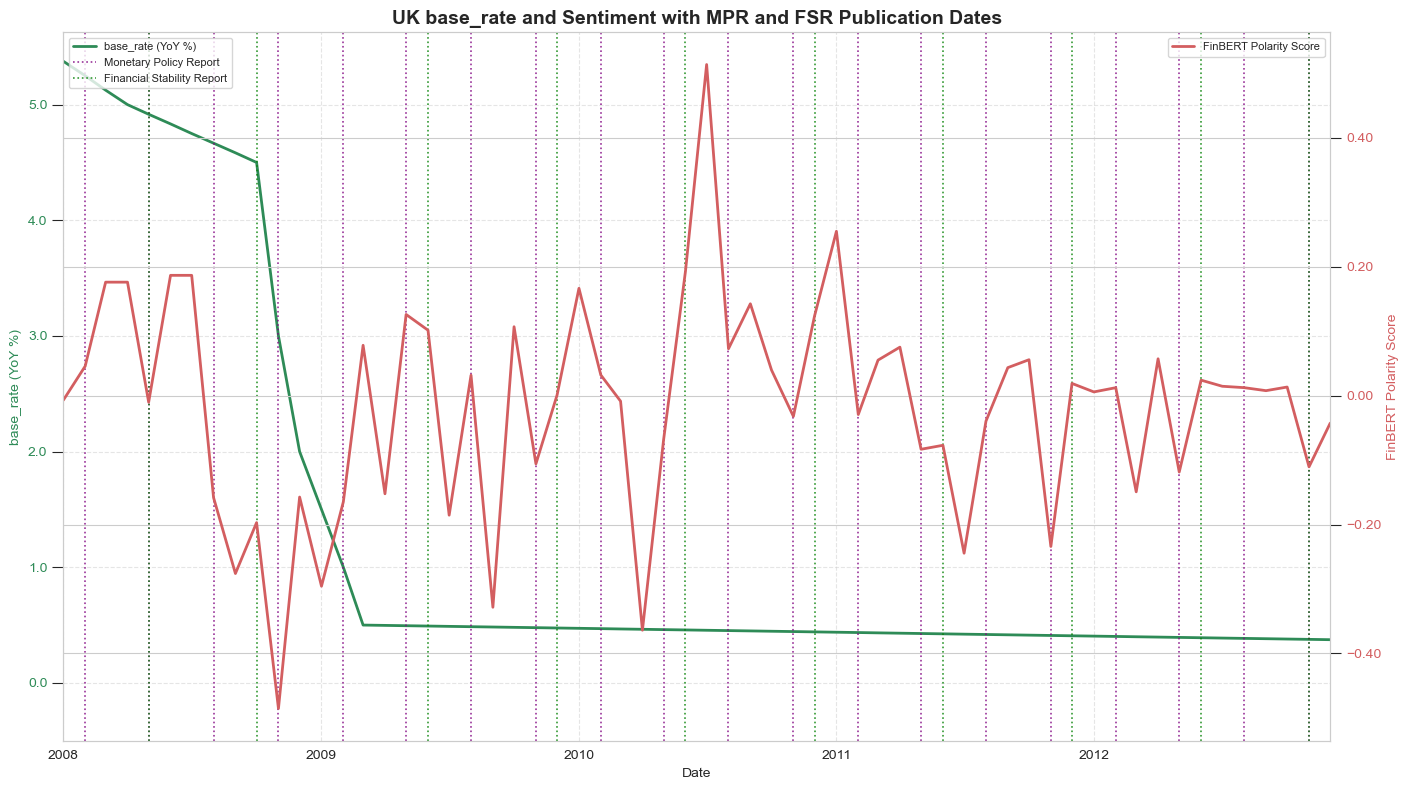

In [9]:

start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# base_rate Line (Left Axis)
color_base_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### UK Base Rate Trend:
* Sharp decline from over 5% in 2008 to around 0.5% by early 2009.
* Remained flat (near 0.5%) from 2009 through 2012 — indicating an extended period of monetary easing.

### FinBERT Polarity Score Trend:
* Volatile throughout the period, with multiple sharp spikes and dips.
* Deep sentiment drop during the 2008–2009 crisis, partial recovery, but still negative-to-neutral sentiment persists through 2012.

### Insights:

### 1. Policy Decisions (Rate Cuts) Precede or Coincide with Major Negative Sentiment:

* Significant rate drops occurred during heightened negative sentiment, especially around the Global Financial Crisis.

### 2. Reports Are Frequent During Volatility:

* During 2008–2010, both MPRs and FSRs are published frequently — consistent with crisis management communication.

### 3. Sentiment Reactivity:

* Some spikes in sentiment (positive or negative) align closely with publication dates, suggesting market/media reactions to report content.

### 4. Flat Rate, Persistently Mixed Sentiment:

* From 2009 onward, although base rate remains unchanged, sentiment continues fluctuating — reflecting ongoing economic uncertainty despite stable monetary policy.

### Summary
It suggests that while monetary policy stabilized after the 2008 crisis, sentiment remained volatile, highlighting the complex and lagging relationship between policy signaling and market perception.

### Drop unncessary columns to reduce the number of variables to be explored

In [15]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [17]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [18]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,2.2,-0.007201,-13.0,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,2.5,0.045560,-17.0,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,2.5,0.175849,-19.0,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,3.0,0.175849,-24.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,3.3,-0.010290,-29.0,5.4,4.7,-0.5,5657.73,4.916667,164.014


# Correlation analysis

### Create pairplot for visual correlation analysis

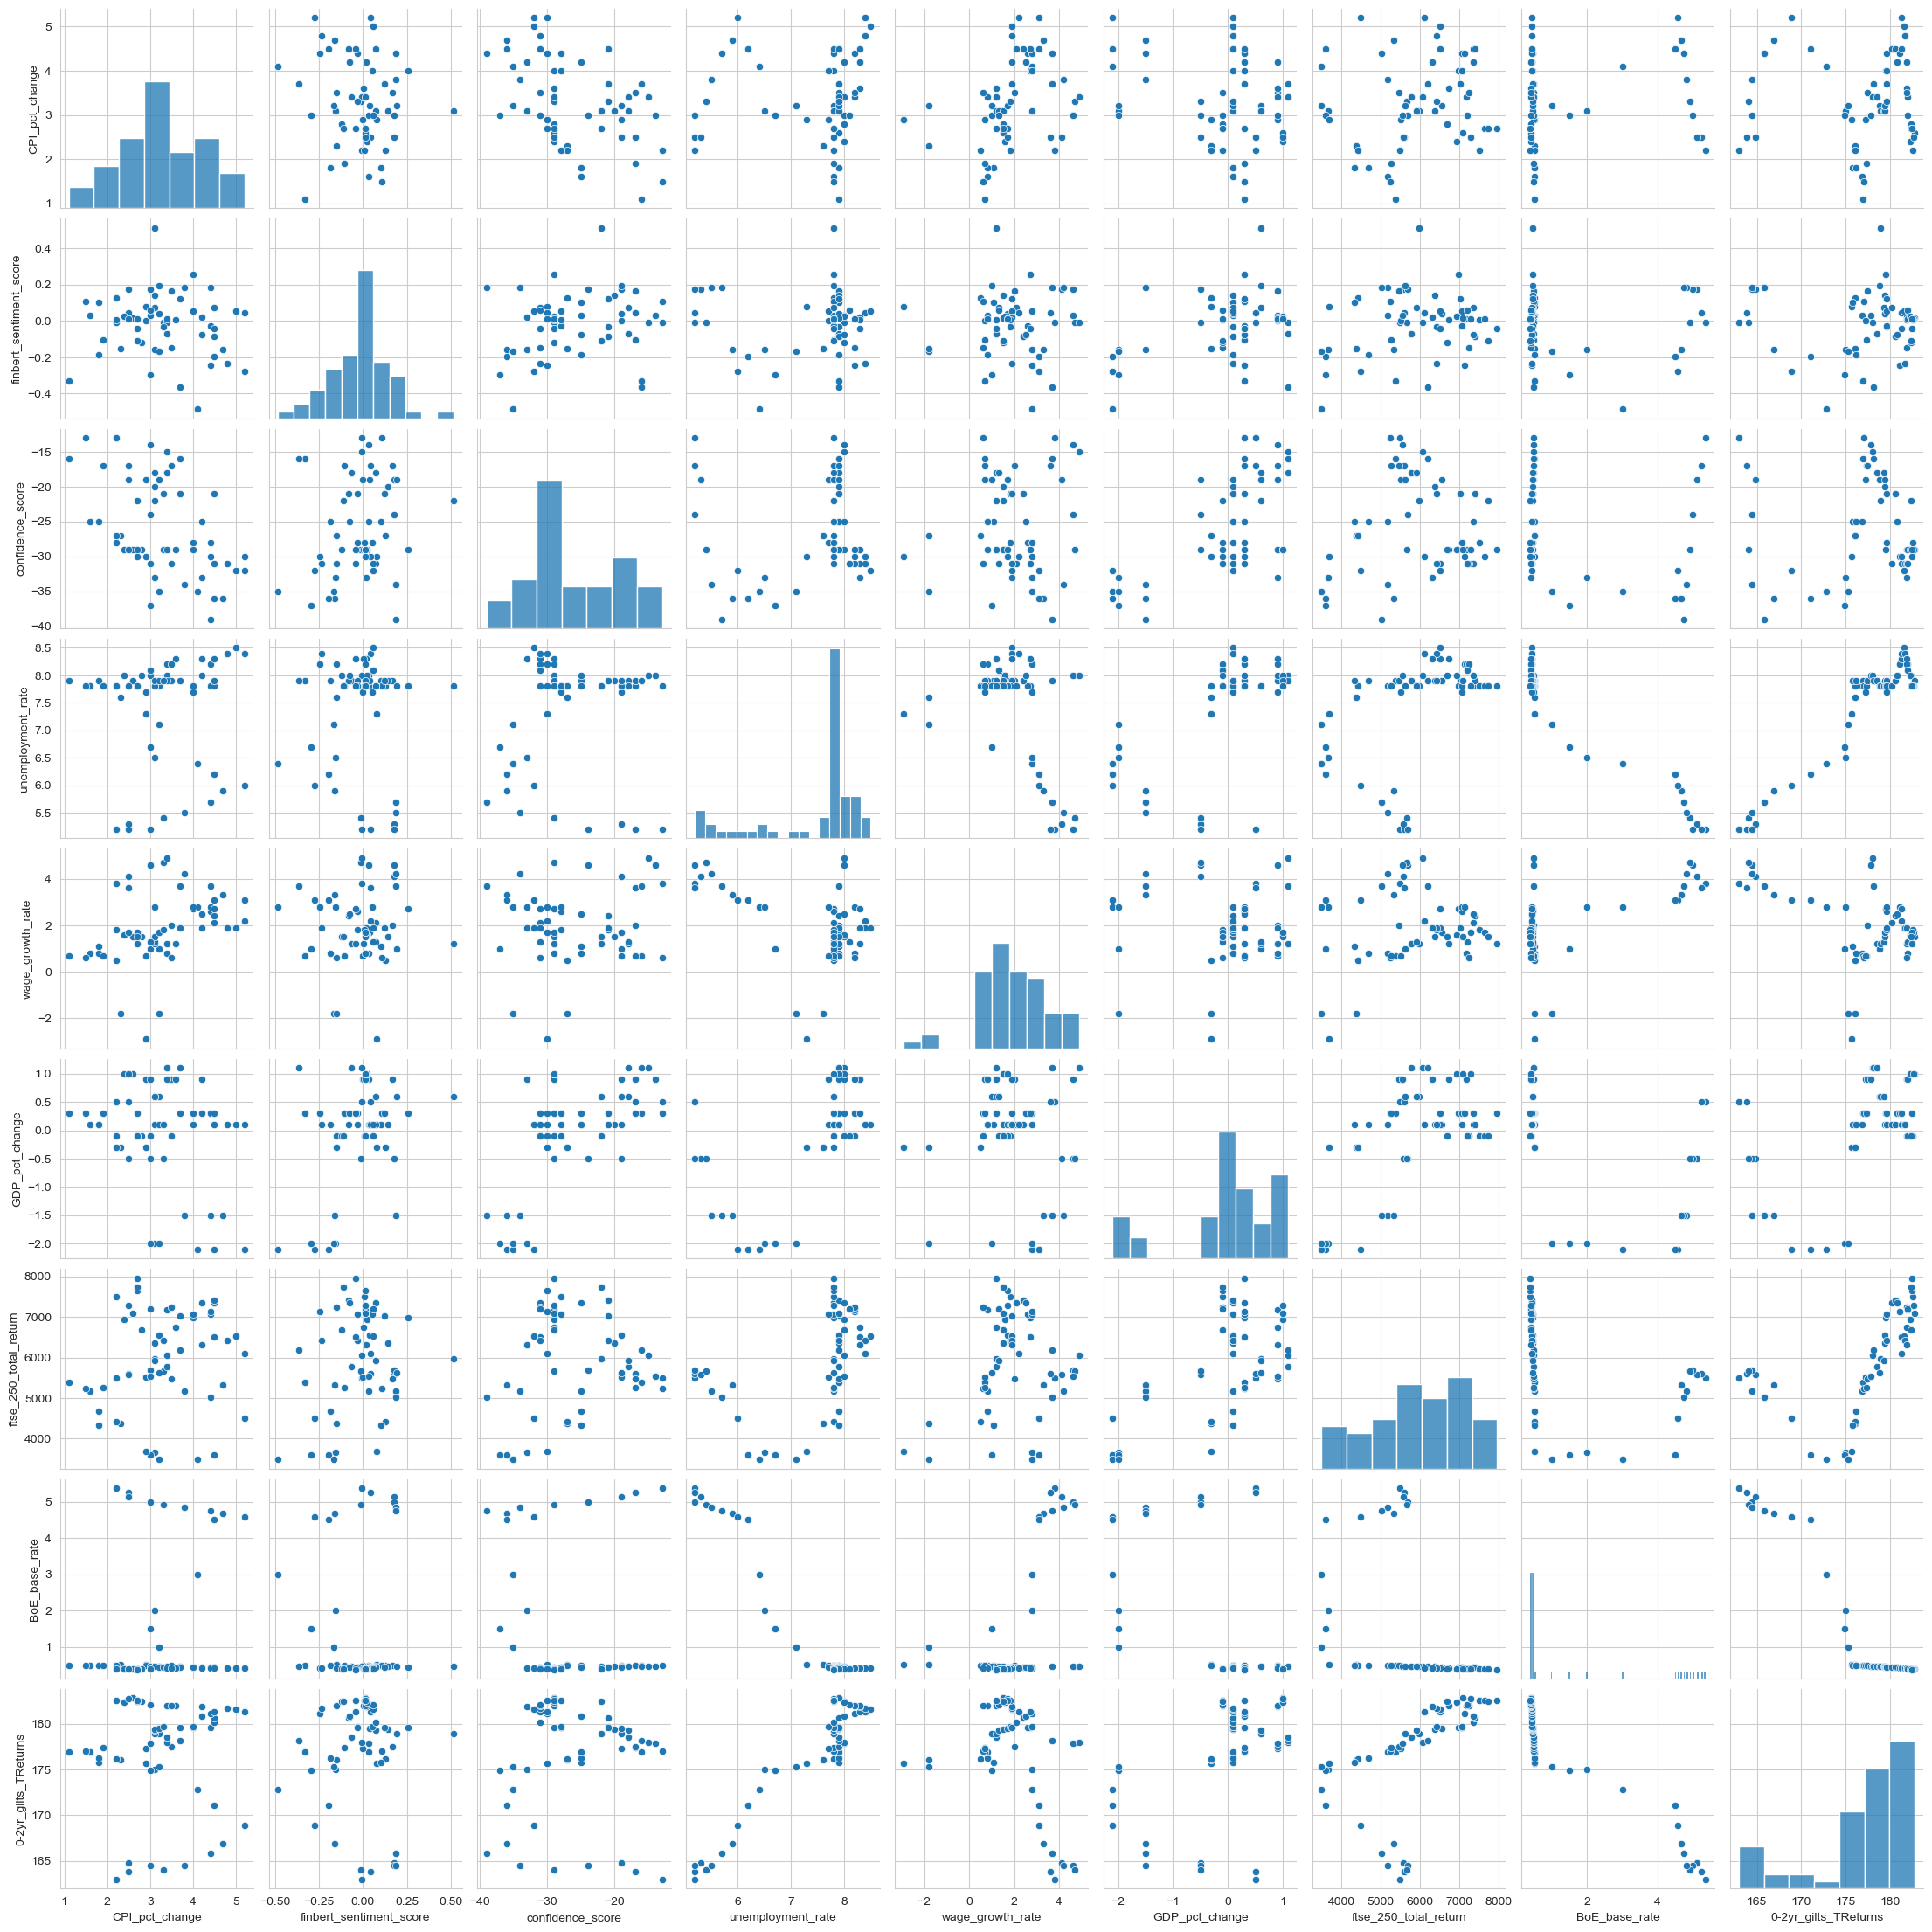

In [21]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

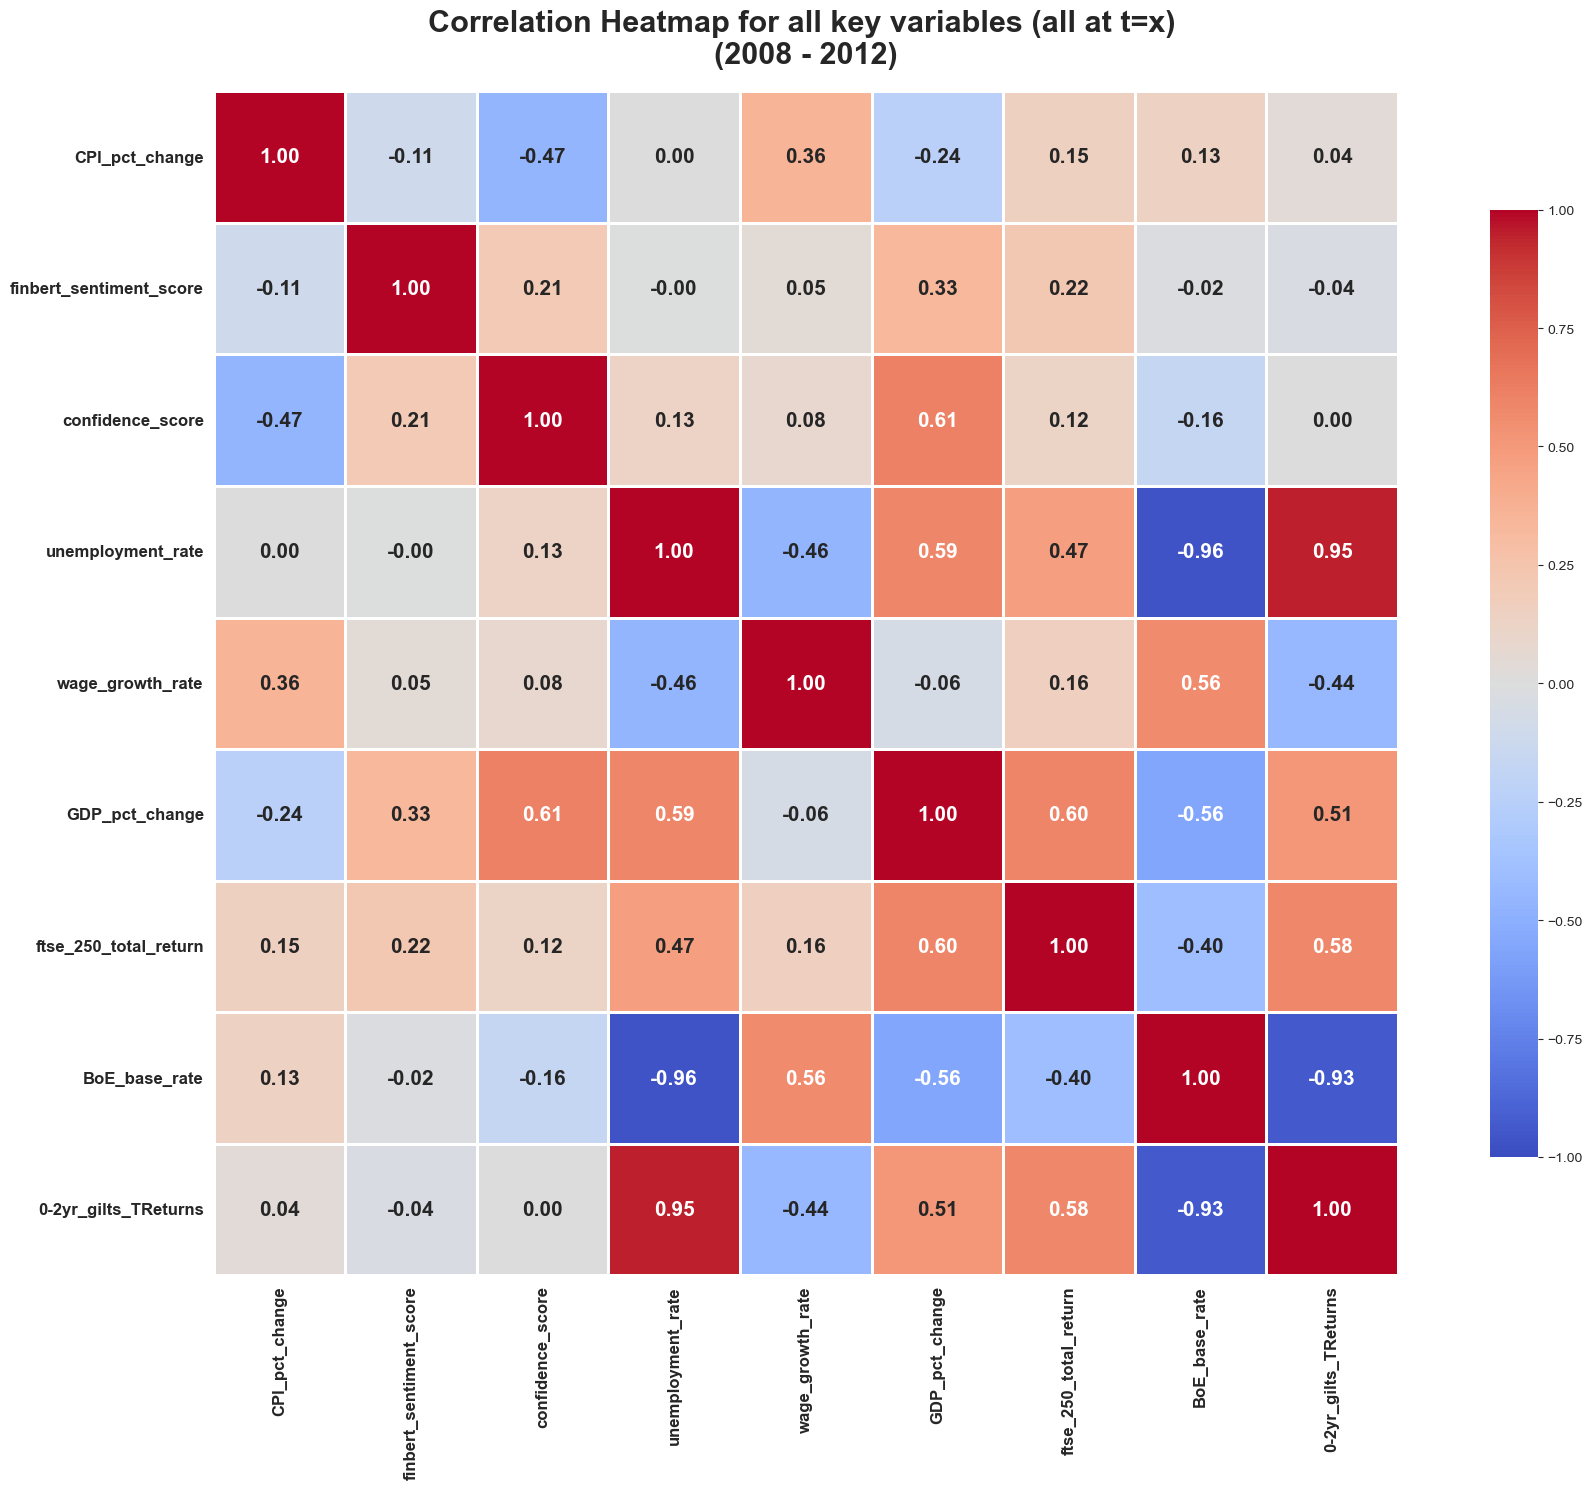

In [23]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(2008 - 2012)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### BoE Base Rate Relationships

### Strong Negative Correlation with:

0-yr_gilts_TRReturns (−0.93): Falling base rates lead to rising gilt prices (bond yields drop → prices rise).

unemployment_rate (−0.96): Rates are often cut in response to rising unemployment.

### Strong Positive Correlation with:

wage_growth_rate (0.56): Higher rates tend to appear when wages are rising, possibly to curb inflation.

Negative with GDP (−0.56): Higher interest rates may slow economic growth.

## 2. GDP_pct_change
Positively correlates with:

confidence_score (0.61)

0-yr_gilts_TRReturns (0.51)

ftse_250_total_return (0.60)

finbert_sentiment_score (0.33)

As expected, stronger GDP growth aligns with better sentiment, equity returns, and investor confidence.

### 3. FTSE 250 Total Return
Strong positive correlation with:

GDP_pct_change (0.60)

0-yr_gilts_TRReturns (0.58)

unemployment_rate (0.47) — somewhat surprising, may indicate lagging effect or specific period behavior.

Negative with BoE_base_rate (−0.40) — lower rates can support equity markets.

### 4. Confidence and Sentiment Metrics
confidence_score is:

Moderately correlated with GDP (0.61), unemployment_rate (0.59), ftse_250_total_return (0.12).

finbert_sentiment_score is:

Weakly to moderately correlated with GDP (0.33), and confidence_score (0.21).

Shows little/no correlation with BoE_base_rate or unemployment_rate.

### 5. Unemployment
Strong positive correlation with:

0-yr_gilts_TRReturns (0.95)

Indicates that government bonds tend to perform well during times of high unemployment (flight to safety).

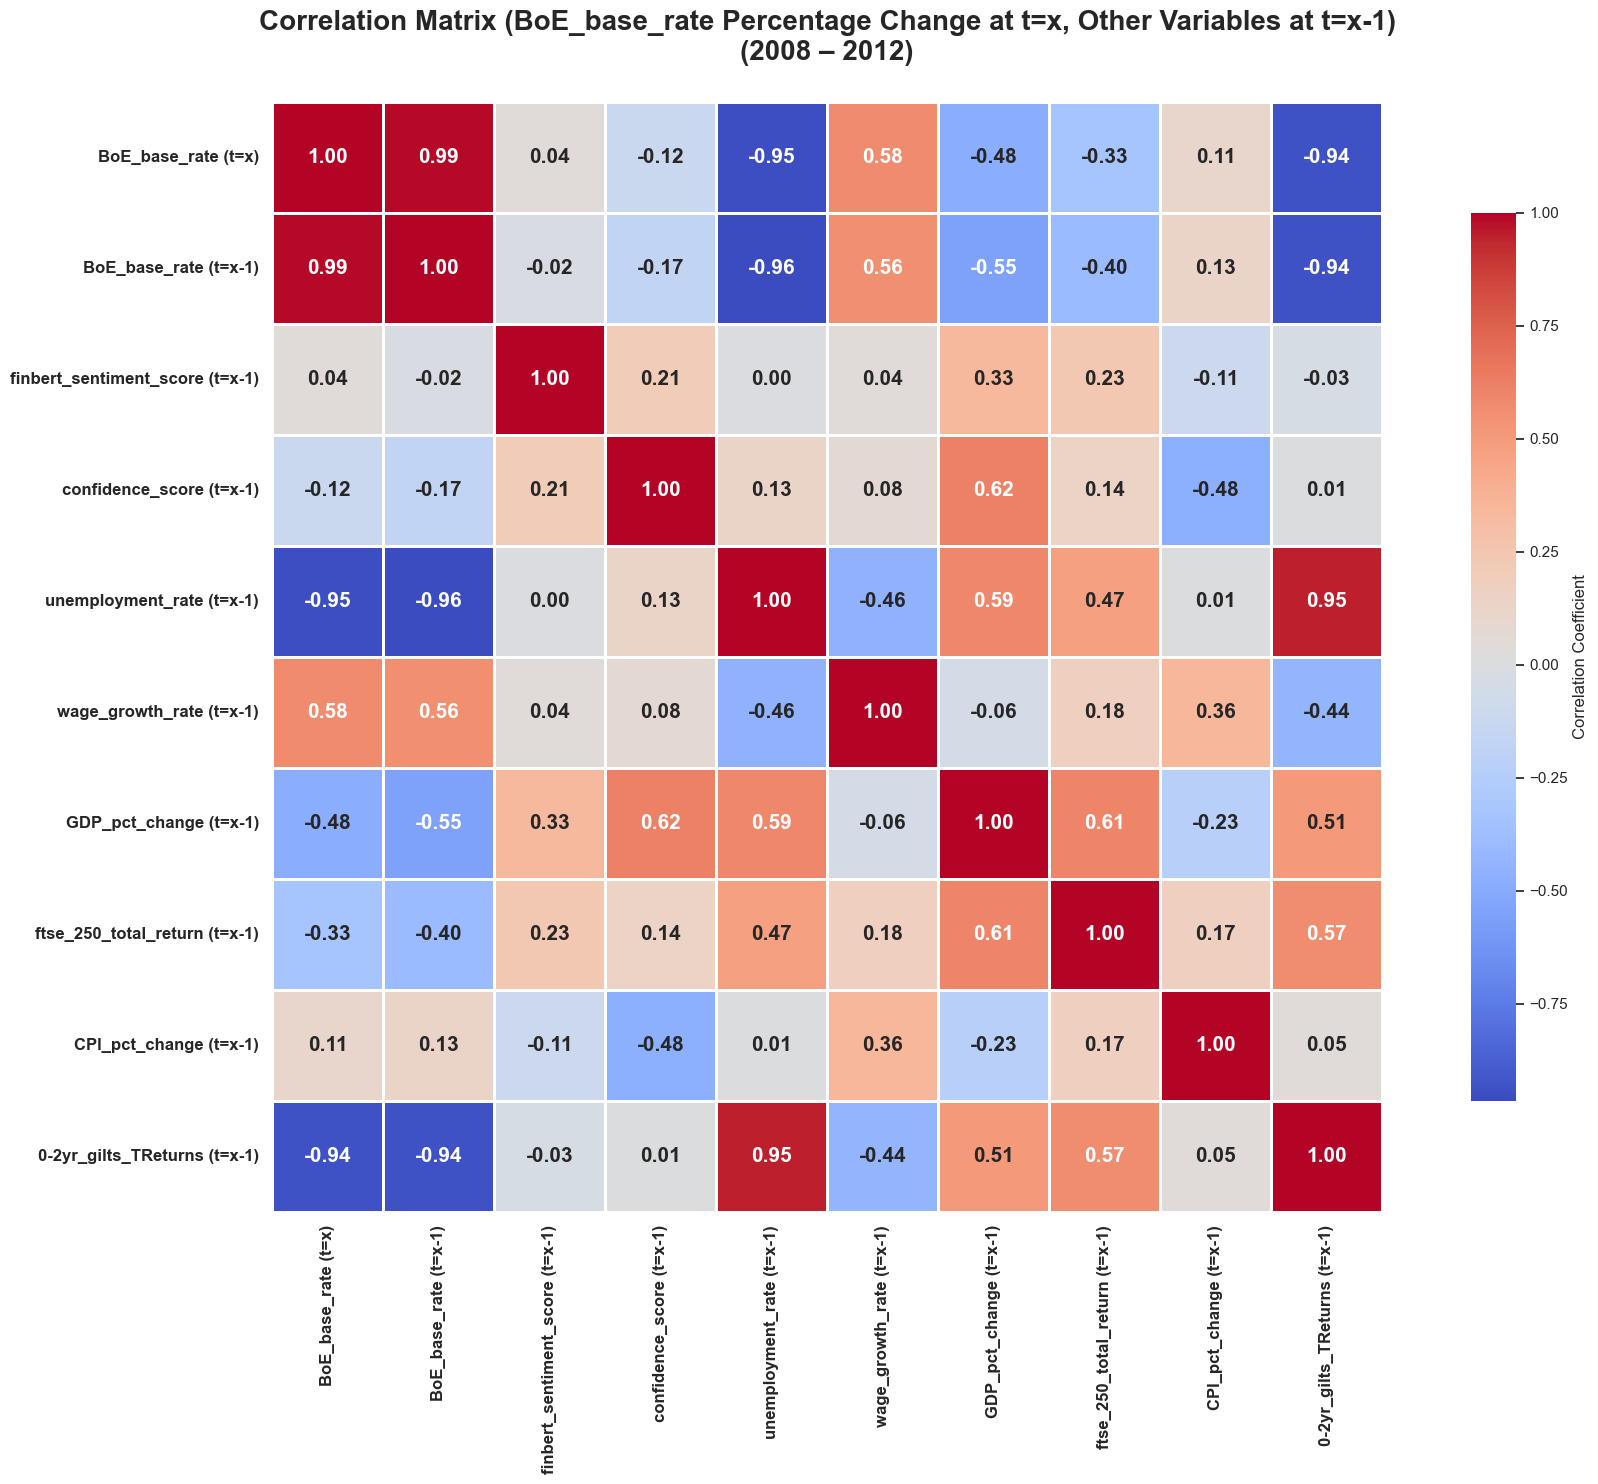

In [25]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-1)\n(2008 – 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### BoE Base Rate (t) and Prior Economic Indicators (t−1):
### Strong Negative Correlation with:

### Unemployment rate (−0.95):
➤ As unemployment increased, the BoE lowered interest rates aggressively — a textbook counter-cyclical policy.

### 2-yr Gilts TRReturns (−0.94):
➤ Strong inverse link, indicating gilts rallied ahead of rate cuts (prices rise as yields fall).

### GDP growth (−0.48):
➤ Slowing GDP in the prior period correlated with rate reductions.

### FTSE 250 returns (−0.33):
➤ Weak equity performance preceded rate cuts, reflecting worsening economic sentiment.

### Strong Positive Correlation with:

### Wage growth (0.58):
➤ Somewhat surprising; may reflect earlier tightening before crisis or residual multicollinearity. Alternatively, BoE was slower to react early in the downturn.

### BoE base rate at t−1 (0.99):
➤ Reflects persistence — rate changes were incremental or adjusted gradually.

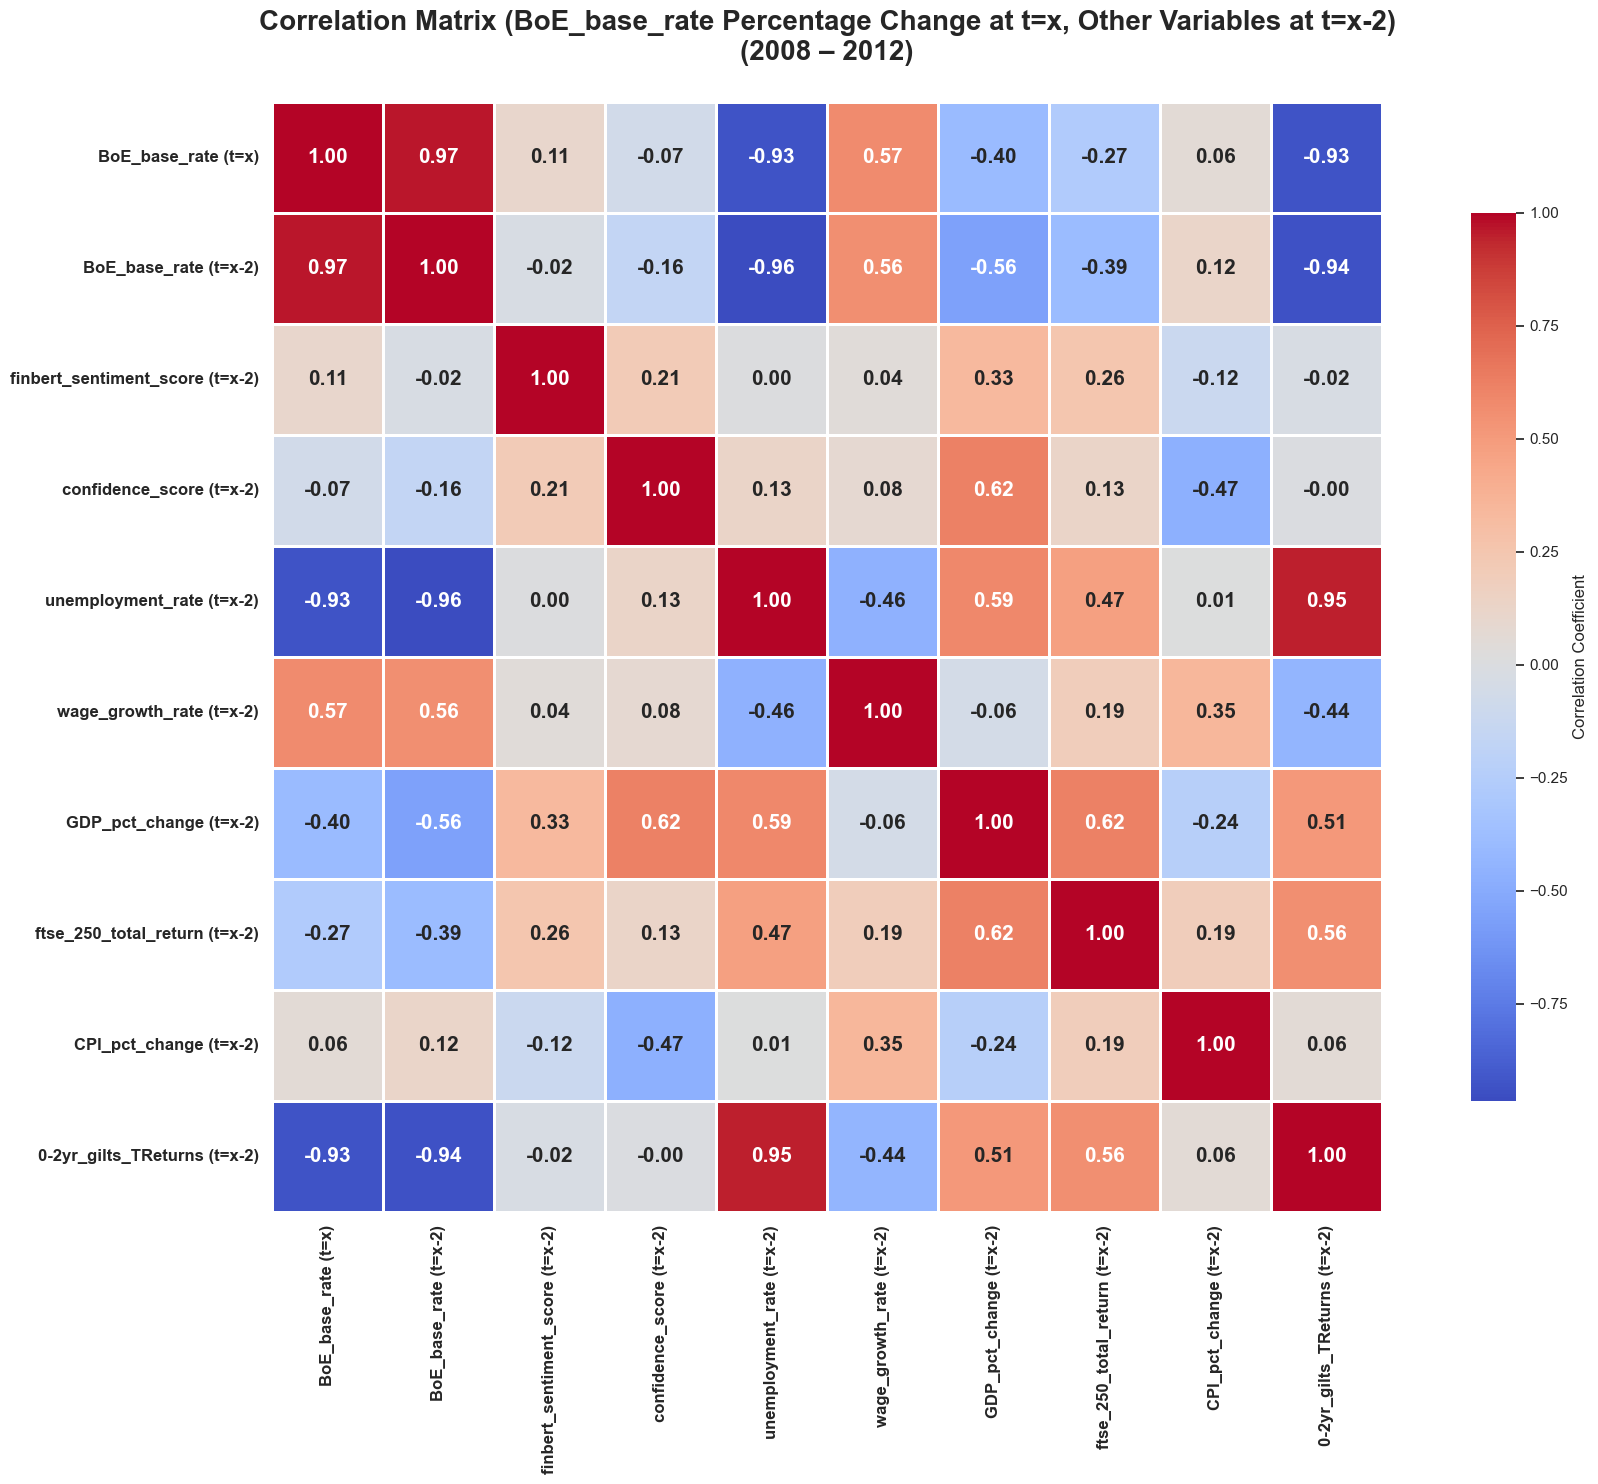

In [27]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(2008 – 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Observations:
### BoE_base_rate (t) vs. Economic Indicators at t−2:
### Strong Negative Correlation:

Unemployment rate (−0.93)
* High unemployment two periods earlier is strongly linked to current rate cuts.

2-yr Gilts Total Returns (−0.93)
* Bonds rallied in advance of rate cuts, suggesting market foresight of BoE easing.

BoE_base_rate at t−2 (0.97)
* Again confirms persistence: base rate doesn't change dramatically between periods.

### Positive Correlation:
Wage growth (0.57)
* Similar to the previous lag, possibly reflecting earlier conditions prompting later tightening.

GDP growth (−0.40)
* Weaker GDP growth two periods earlier precedes rate cuts.

## FinBERT sentiment score (t−2): 0.11
* Slightly higher than at t−1, but still weakly predictive of rate changes.
* Confidence score (t−2): −0.07.Essentially no meaningful relationship.

This reinforces that hard economic data was more influential on rate-setting than sentiment metrics, at least during 2008–2012.

### During 2008–2012:

### BoE rate decisions were highly reactive to fundamental lagged indicators, especially:

### Unemployment (very strong)

Gilt returns (bond market expectations)

GDP weakness

### Sentiment and confidence scores were not strong predictors — possibly due to the magnitude and structural nature of the crisis.

The consistent negative correlations across both t−1 and t−2 lags show that BoE policy was systematically counter-cyclical.



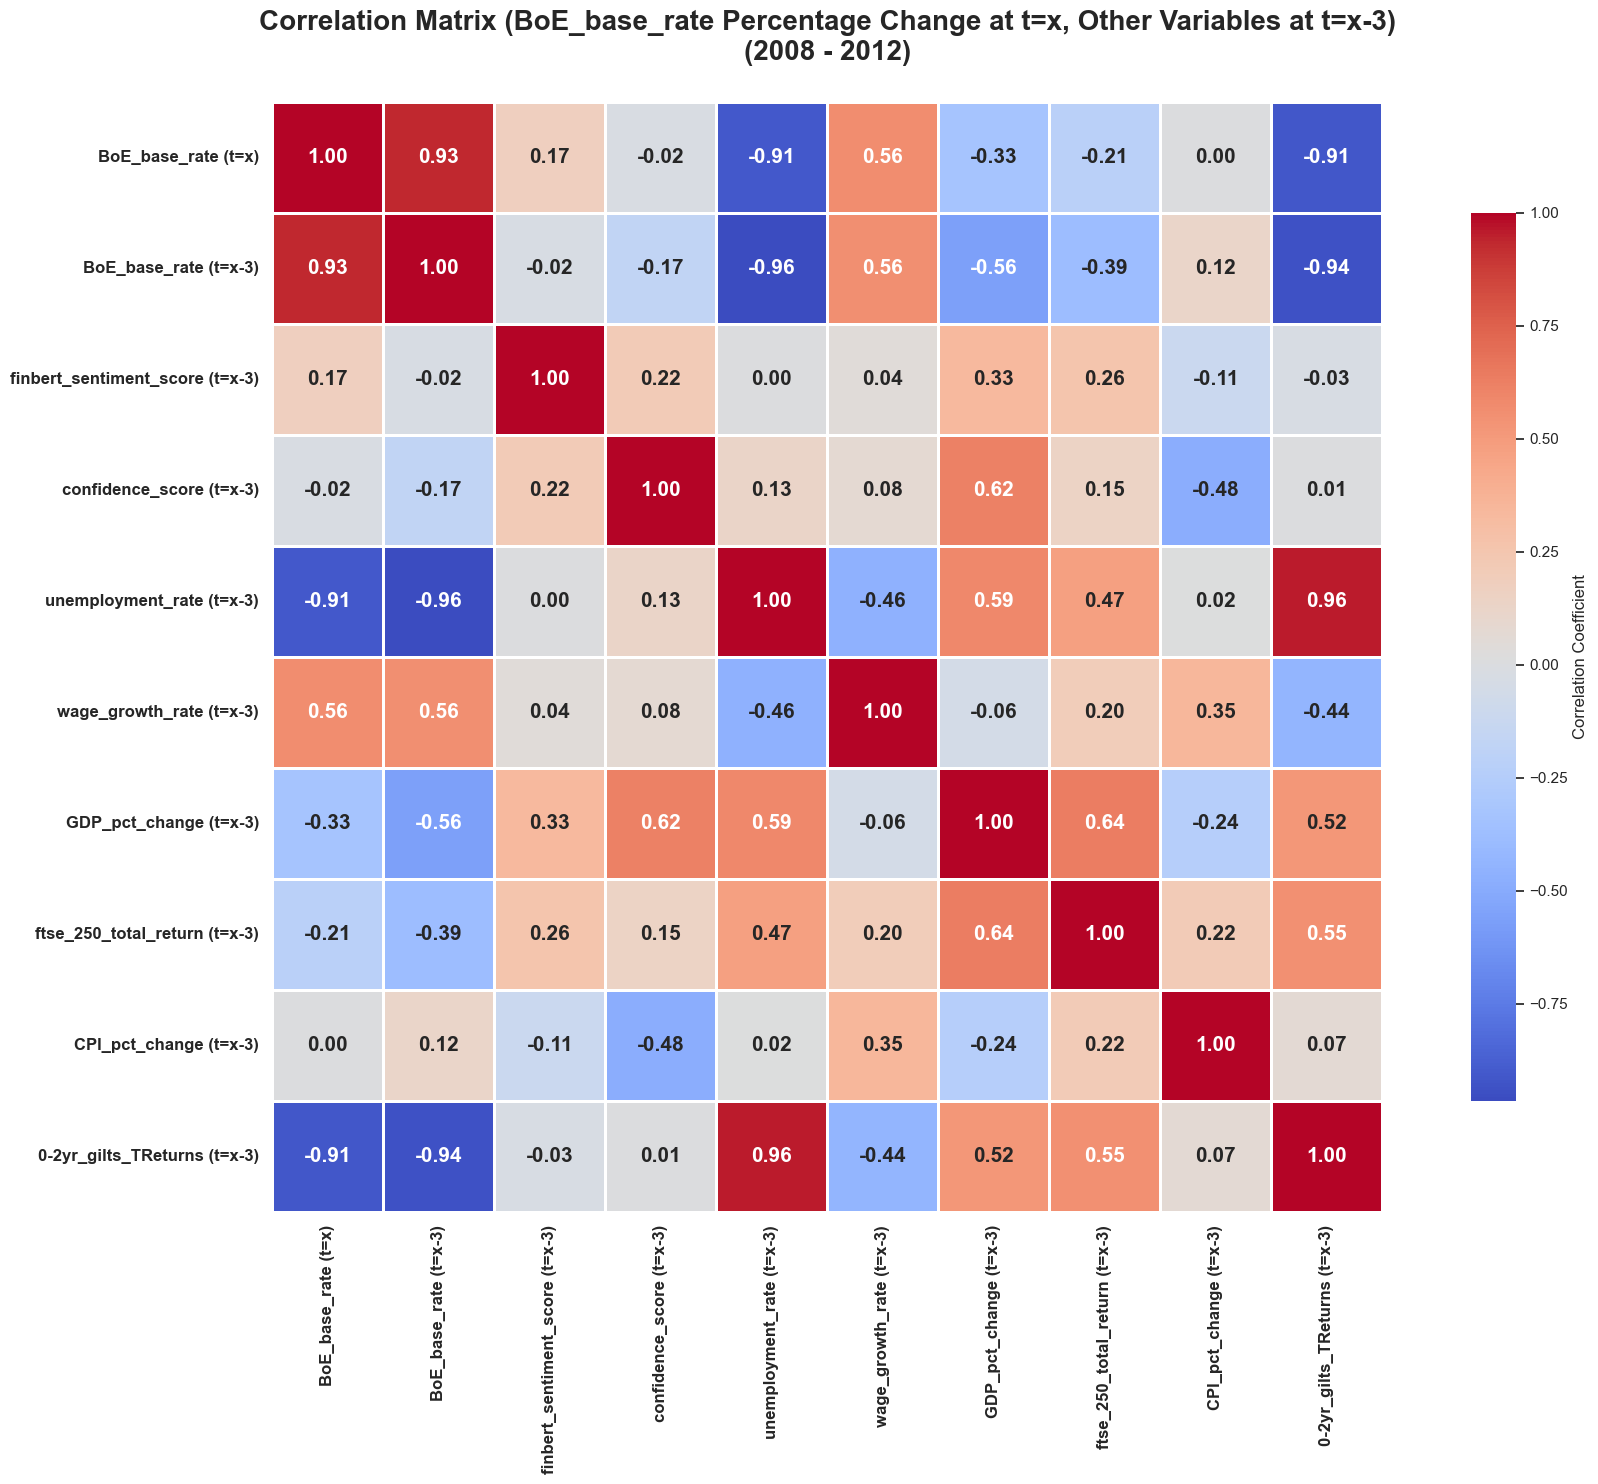

In [31]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(2008 - 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### BoE_base_rate (t) vs. Variables at t−3:
### Strong Negative Correlation with:
Unemployment rate (−0.91)

➤ Consistently the strongest signal across all lags (t−1 to t−3).

➤ Suggests that the BoE persistently responded to rising unemployment with rate cuts even 3 periods later.

2-yr Gilts TRReturns (−0.91)

➤ The bond market tends to react ahead of policy moves, showing foresight of easing.

GDP growth (−0.33)

➤ Weak growth 3 periods prior is still linked with rate cuts.

### Positive Correlation with:
Wage growth (0.56)

➤ Same pattern seen at t−1 and t−2, possibly indicating the policy environment pre-crisis or as an indirect inflation signal.

### Sentiment & Confidence (t−3):

FinBERT Sentiment (0.17):

➤ Weak, slightly more positive than earlier lags, but still not a strong driver of rate changes.

Confidence Score (−0.02):

➤ Essentially uncorrelated — confidence 3 months earlier has no direct influence on BoE decisions in this timeframe.

### Inter-Market Relationships at t−3:
Unemployment ↔ Gilts (0.96):

➤ Very tight inverse relationship: bad job data → bond market rally.

GDP growth ↔ Confidence (0.62), FTSE 250 (0.64):

➤ Solid positive correlations: GDP drives confidence and equity returns.

### Summary:
BoE Rate Decisions at t Were:
Heavily driven by lagged unemployment and bond market signals — even up to three periods back.

Only modestly influenced by GDP and wage growth.

Largely unaffected by sentiment indicators like FinBERT or confidence scores.

This shows that during crisis years (2008–2012), the Bank of England's interest rate decisions were strongly reactive to hard lagging macroeconomic indicators, especially unemployment, rather than leading or soft sentiment data.

### From the above matrices, the variables that best correlate with BoE_base_rate at t=0 are unemployment_rate (t−1), GDP_pct_change (t−1), wage_growth_rate (t−1)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

### Dependent variable:

BoE_base_rate_change (t)

### Independent variables:

unemployment_rate (t−1)

GDP_pct_change (t−1)

wage_growth_rate (t−1)

# Multiple linear regression: BoE_base_rate_change (t) vs unemployment_rate (t−1), GDP_pct_change (t−1) and wage_growth_rate (t−1)

### Prepare regression dataframe

In [36]:
df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,2.2,-0.007201,-13.0,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,2.5,0.045560,-17.0,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,2.5,0.175849,-19.0,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,3.0,0.175849,-24.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,3.3,-0.010290,-29.0,5.4,4.7,-0.5,5657.73,4.916667,164.014


In [37]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change']
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(3)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),unemployment_rate (t=x-1),GDP_pct_change (t=x-1),wage_growth_rate (t=x-1)
BoE_base_rate (t=x),1.000000,-0.939392,-0.701610,0.562604
unemployment_rate (t=x-1),-0.939392,1.000000,0.778341,-0.517074
GDP_pct_change (t=x-1),-0.701610,0.778341,1.000000,-0.414738
wage_growth_rate (t=x-1),0.562604,-0.517074,-0.414738,1.000000


In [38]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['unemployment_rate (t=x-1)', 'GDP_pct_change (t=x-1)', 'wage_growth_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [39]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 4.72008624,  4.85843016,  4.46667029,  4.3582926 ,  4.05163853,
        3.61001555,  3.40175043,  3.04515265,  2.72103843,  2.56271702,
        2.21610798,  1.79542567,  1.29898548,  0.54433647,  0.16784179,
        0.11939656,  0.34913764,  0.59240366,  0.40411603,  0.56243743,
        0.62748515,  0.77581781,  0.46916374,  0.33585449,  0.46570815,
        0.88373687,  0.85117271,  0.88962921,  0.63991063,  0.55740276,
        0.41905884,  0.42904759,  0.47403723,  0.49401471,  0.66232486,
        0.64730145,  0.8855328 ,  0.71722265,  0.60389088,  0.37564828,
        0.0889717 , -0.08437312, -0.2127283 , -0.38103844, -0.17261214,
       -0.04425696, -0.04425696, -0.01099633, -0.08091753,  0.03744891,
        0.31335967,  0.38328087,  0.56157976,  0.59232307,  0.58233432,
        0.60231181,  0.66232486])

In [40]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.8929378994038413
Intercept:  12.794078876787408
Coefficients:


[('unemployment_rate (t=x-1)', -1.5832140536301293),
 ('GDP_pct_change (t=x-1)', 0.1250607677548183),
 ('wage_growth_rate (t=x-1)', 0.09988742862972176)]

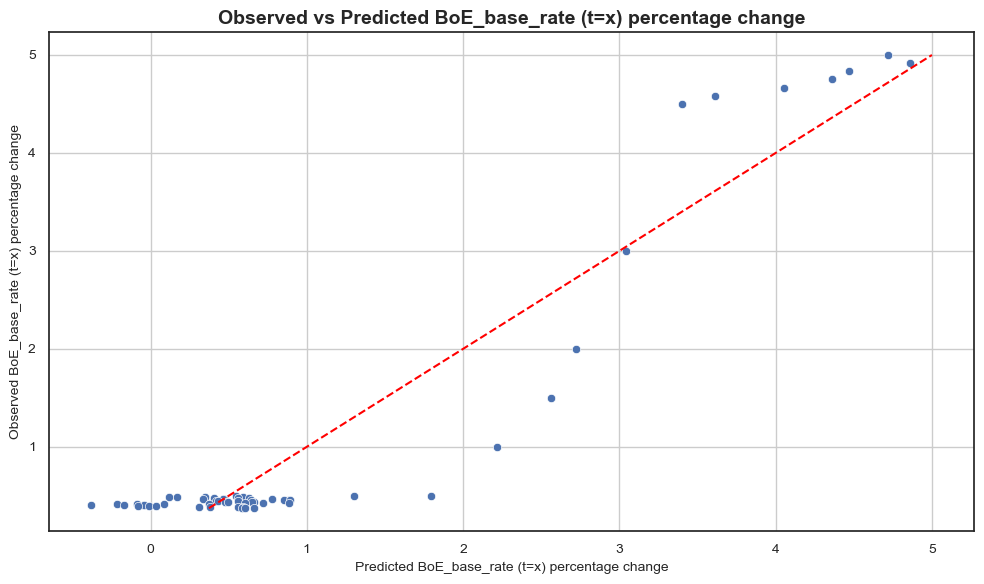

In [41]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate (t=x) percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate (t=x) percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate (t=x) percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

## 1. General Fit:
Most data points lie close to the red line, especially at the higher end — suggesting the model captures the magnitude of large rate changes fairly well.

The clustering around low values (~0.5%) also shows the model correctly predicts periods when the base rate remained flat or stable — common after the 2008 crisis.

## 2. Model Strengths:
Accurate at extremes: The few large values (~5%) are predicted well, showing your model captures big monetary shifts, like those during crisis periods.

Tight clustering at low rates: Reflects the BoE's policy of keeping rates near zero for a long time, which the model has captured.

## 3. Weaknesses or Opportunities:
Some scatter around 0–2% range suggests residual error — your model might slightly under- or over-estimate base rate changes in non-extreme conditions.

A few predictions are slightly off the diagonal line, which might indicate:

Omitted variables

Lag selection needing refinement

Nonlinear patterns not captured by linear regression

### Training and testing subsets with MLR

In [44]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [45]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.864
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     86.60
Date:                 Mon, 19 May 2025   Prob (F-statistic):           8.78e-18
Time:                         14:33:44   Log-Likelihood:                -29.792
No. Observations:                   45   AIC:                             67.58
Df Residuals:                       41   BIC:                             74.81
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

### <span style="color: orange;">R-squared: 0.864

Your model explains 86.4% of the variance in the BoE base rate – very strong fit.

Adj. R-squared: 0.854

Adjusts for the number of predictors – still high, indicating your predictors are useful.

### <span style="color: orange;">  Coefficients & Interpretation:
Intercept (const) | 12.40 | 0.000 | ✅ Highly significant | Baseline rate when all predictors are zero |
| Unemployment_rate (t−1) | −1.53 | 0.000 | ✅ Highly significant | A 1% increase in unemployment predicts a 1.53% decrease in base rate |
| GDP_pct_change (t−1) | 0.138 | 0.289 | ❌ Not significant | No strong evidence this variable affects base rate |
| Wage_growth_rate (t−1) | 0.077 | 0.178 | ❌ Not significant | Somewhat positive effect, but statistically weak

### <span style="color: orange;"> Model Diagnostics:
Test	Value	Interpretation

F-statistic	86.60	Model is overall significant (p < 0.001)

Durbin-Watson	1.733	Close to 2 → no major autocorrelation

Prob(Omnibus)	0.270	Residuals are fairly normal

Cond. No.	131	No red flags for multicollinearity

### <span style="color: orange;"> Conclusion:

The model is statistically robust and well-specified.

Unemployment rate (t−1) is the only statistically significant predictor, and strongly so.

GDP growth and wage growth don’t appear to meaningfully influence BoE base rate in this sample (2008–2012), likely because the BoE was reacting more to crisis conditions (i.e., labor market stress) than to traditional inflation or growth signals.


In [47]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [48]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [-0.36623537  0.78898503  2.58449434  0.60781812  3.22820381  3.8463236
  0.09666482  0.58471326  0.85631339 -0.05085317  0.69579317  0.5912277
  0.20410325  2.43167574  0.38124054  0.48169258  0.50120925  0.58352608
  0.58222844  0.83475332  1.72582805  0.48580601  0.36009525  0.07115895
  0.57256724 -0.07600142  4.66344507  0.80477641  4.25856966 -0.14172782
  0.37919714  0.64188183  0.38157151 -0.01201409  2.10293369  0.50684084
  0.43189466  0.66172947  0.65965943  2.89176014 -0.20571515  0.27220402
  0.65684364  0.4140066   0.58592709]


In [49]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ 4.52602971e+00  3.41953051e+00  4.35151885e-01  6.07460509e-01
  6.61729471e-01  5.98929321e-01  8.49384168e-01  4.42853506e-01
 -1.20140910e-02  1.28156168e+00  3.05818218e-03  4.14425917e+00]


In [50]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

92.55552053981081


### <span style="color: orange;"> R-square of 92.55% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but potential issues with multicollinearity remain

### Check for multicollinearity

In [53]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0       266.0                      const
1         2.8  unemployment_rate (t=x-1)
2         2.6     GDP_pct_change (t=x-1)
3         1.3   wage_growth_rate (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

## <span style="color: orange;"> const	266.0	This is the intercept. A high VIF here is not a concern.
## <span style="color: orange;"> unemployment_rate (t=x-1)	2.8	Moderate multicollinearity – acceptable but worth watching.
## <span style="color: orange;"> GDP_pct_change (t=x-1)	2.6	Also shows moderate multicollinearity.
## <span style="color: orange;"> wage_growth_rate (t=x-1)	1.3	Low multicollinearity – not a concern.

General VIF Guidelines:

VIF = 1: No multicollinearity.

VIF < 5: Acceptable.

VIF ≥ 5: Indicates significant multicollinearity.

VIF ≥ 10: Serious multicollinearity problem.

## <span style="color: orange;"> Conclusion:

## <span style="color: orange;"> The independent variables do not show serious multicollinearity.

## <span style="color: orange;"> The model appears fine from a multicollinearity standpoint.

## <span style="color: orange;"> The very high VIF for const is expected and can be ignored.

### Check for heteroscedasticity

In [56]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [57]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 18.25499640327979, 'LM Test p-value': 0.0003896688492279337, 'F-stat': 9.328282568465188, 'F-test p-value': 7.979483944452718e-05}


### LM stat	18.25	Test statistic for the LM test.
### LM Test p-value	0.00039	Very small p-value: Reject the null hypothesis of homoskedasticity (constant variance).
### F-stat	9.33	F-statistic from the auxiliary regression.
### F-test p-value	0.0000798	Also very small: Confirms heteroskedasticity.

### <span style="color: orange;"> Both the LM Test and F-test suggest heteroskedasticity is present in the regression residuals.

### <span style="color: orange;"> This means the assumption of constant error variance (homoskedasticity) is violated.

### <span style="color: orange;"> In such cases, standard errors may be biased, so you should consider:

### <span style="color: orange;"> Using robust standard errors.

### <span style="color: orange;"> Investigating potential model misspecification.

### <span style="color: orange;"> Trying transformations or adding missing variables.

### Check normality of regression residuals - assumption of MLR

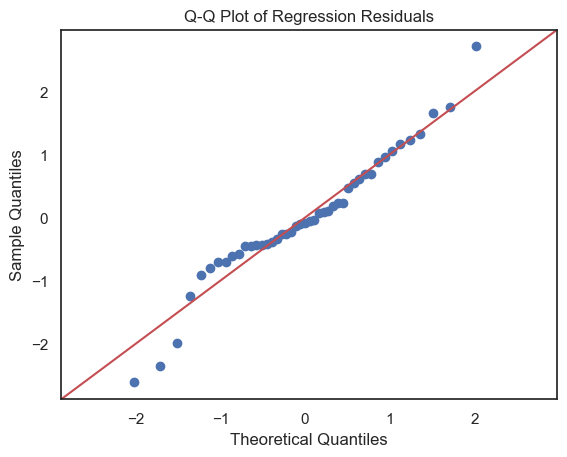

In [61]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### The residuals are approximately normally distributed, but there is some deviation in the tails indicating mild non-normality.

### This is not severe, and linear regression is generally robust to slight deviations from normality—especially with large sample sizes.

### However, if the model is used for inference (e.g., p-values, confidence intervals), consider:

### * Running a formal normality test (e.g., Shapiro-Wilk).

### * Using robust regression if the deviations impact inference.

## Evaluate the model

In [64]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.4007435721131625
Mean Square Error (Final): 0.26337957202618123


### <span style="color: orange;">  MAE	Average absolute difference between actual and predicted values.	On average, your predictions are off by ~0.40 units.
### <span style="color: orange;"> MSE	Average of squared differences between actual and predicted values. Penalizes larger errors more.

### If your target variable ranges from 0 to 1, then an MAE of 0.4 might be high.

### If your target ranges over 0–10 or higher, this could be acceptable or even good.

### MAE and MSE are both relatively low in absolute terms, but only relative comparison to baseline or previous models can tell if this is good.

### To strengthen the assessment, consider also:

* R² (coefficient of determination)

* Residual plots for pattern or bias

* Comparison to simpler benchmarks (like mean prediction)

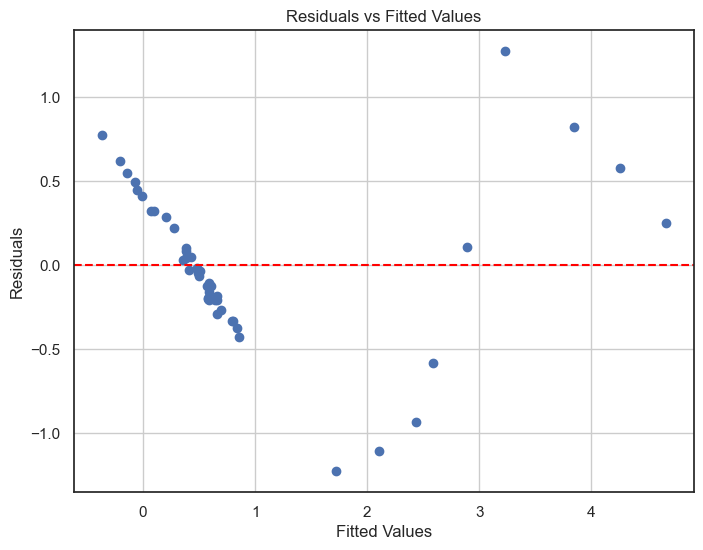

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

### - Clear pattern/curve shape: The residuals do not appear randomly scattered around the horizontal line (red dashed = 0). Instead, there is a distinct curved pattern.

### - Fan or bowtie shape: There's some indication of increasing spread of residuals as fitted values increase

### What This Suggests:

### 1. Non-linearity:
The model may be missing a non-linear relationship between the predictors and the response variable. A linear model might not be sufficient.

### 2. Model misspecification:
Perhaps important terms (e.g., interaction terms or polynomial terms) are missing, or the functional form of the model is wrong.

### 3. Possible heteroskedasticity:
The spread of residuals increases at higher fitted values, suggesting non-constant variance, which aligns with your previous Breusch-Pagan test result.

## Multiple linear regression: Drop GDP_pct_change (t=x-1), unemployment_rate (t=x-1) as variables and explore transformation of dependent variable (if possible)

# Re-perform MLR without GDP_pct_change (t=x-1), unemployment_rate (t=x-1) as independent variables. Transformation of dependent variable not straight forward as it contains negative numbers

In [70]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['wage_growth_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [71]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 2.04282326,  1.93702263,  2.2015242 ,  2.46602577,  2.51892608,
        2.25442451,  1.98992295,  1.77832169,  1.67252107,  1.67252107,
        1.51382013,  1.51382013,  0.56161449, -0.91959428, -1.50149773,
       -0.91959428,  0.29711292,  0.6145148 ,  0.45581386,  0.45581386,
        0.40291355,  0.35001324,  0.40291355,  0.40291355,  1.09061762,
        2.46602577,  2.62472671,  1.98992295,  0.66741512,  0.56161449,
        0.66741512,  0.72031543,  0.82611606,  0.93191668,  0.984817  ,
        1.03771731,  1.46091982,  1.4080195 ,  1.51382013,  1.14351794,
        1.30221888,  1.35511919,  1.51382013,  1.46091982,  1.19641825,
        1.03771731,  1.03771731,  1.03771731,  0.66741512,  0.45581386,
        0.35001324,  0.72031543,  0.82611606,  0.87901637,  0.82611606,
        0.93191668,  0.984817  ])

In [72]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.31652293156249467
Intercept:  0.032611356505684475
Coefficients:


[('wage_growth_rate (t=x-1)', 0.5290031327997845)]

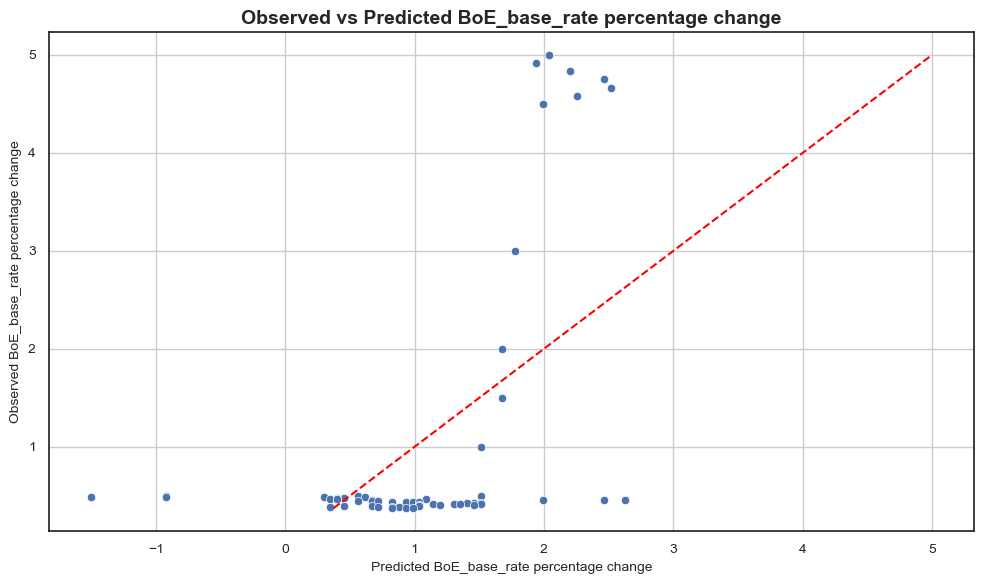

In [73]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [75]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [76]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.255
Model:                             OLS   Adj. R-squared:                  0.237
Method:                  Least Squares   F-statistic:                     14.68
Date:                 Mon, 19 May 2025   Prob (F-statistic):           0.000410
Time:                         14:33:46   Log-Likelihood:                -68.023
No. Observations:                   45   AIC:                             140.0
Df Residuals:                       43   BIC:                             143.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

### The model is statistically significant, but the predictive power is weak (R² = 0.255).

### wage_growth_rate (t=x-1) is a significant predictor of BoE base rate changes.

### Residuals are not normally distributed, and this matches your earlier Q-Q and residual plots.

### A non-linear model or robust methods may better capture the relationship.

In [78]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         2.7                     const
1         1.0  wage_growth_rate (t=x-1)


### No multicollinearity observed from the VIF output

In [80]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [143]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 9.861910907074282, 'LM Test p-value': 0.0016873575375006534, 'F-stat': 12.068447088364, 'F-test p-value': 0.0011829492529615174}


### LM stat	18.255	Test statistic value
### LM p-value	0.00039	Statistically significant → reject null of homoskedasticity
### F-stat	9.328	Test statistic value from auxiliary regression
### F p-value	0.0000798	Also statistically significant

* Both tests provide strong evidence that your model suffers from heteroskedasticity.

* This violates a key assumption of OLS — constant error variance — which can bias your standard errors and invalidate hypothesis tests.

# Given the model output above, multiple linear regression is likely a good ML model to describe BoE Base Rate. We will explore Random Forest / XGBoost next

In [84]:
regression_df.describe()

,Date,BoE_base_rate (t=x),unemployment_rate (t=x-1),GDP_pct_change (t=x-1),wage_growth_rate (t=x-1)
count,57,57.000000,57.000000,57.000000,57.000000
mean,2010-08-01 06:44:12.631578880,1.067416,7.528070,-0.028070,1.956140
min,2008-04-01 00:00:00,0.373596,5.200000,-2.100000,-2.900000
25%,2009-06-01 00:00:00,0.412921,7.700000,-0.100000,1.100000
50%,2010-08-01 00:00:00,0.452247,7.800000,0.100000,1.900000
75%,2011-10-01 00:00:00,0.491573,8.000000,0.600000,2.800000
max,2012-12-01 00:00:00,5.000000,8.500000,1.100000,4.900000
std,NaN,1.453308,0.867829,0.909818,1.545618


In [85]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 221 to 277
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       57 non-null     datetime64[ns]
 1   BoE_base_rate (t=x)        57 non-null     float64       
 2   unemployment_rate (t=x-1)  57 non-null     float64       
 3   GDP_pct_change (t=x-1)     57 non-null     float64       
 4   wage_growth_rate (t=x-1)   57 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.7 KB


In [86]:
regression_df.head()

,Date,BoE_base_rate (t=x),unemployment_rate (t=x-1),GDP_pct_change (t=x-1),wage_growth_rate (t=x-1)
221,2008-04-01,5.000000,5.3,-0.5,3.8
222,2008-05-01,4.916667,5.2,-0.5,3.6
223,2008-06-01,4.833333,5.4,-1.5,4.1
224,2008-07-01,4.750000,5.5,-1.5,4.6
225,2008-08-01,4.666667,5.7,-1.5,4.7


Root Mean Squared Error: 0.7720
Mean Squared Error: 0.5960
Mean Absolute Error: 0.4915
R² Score: 0.8330


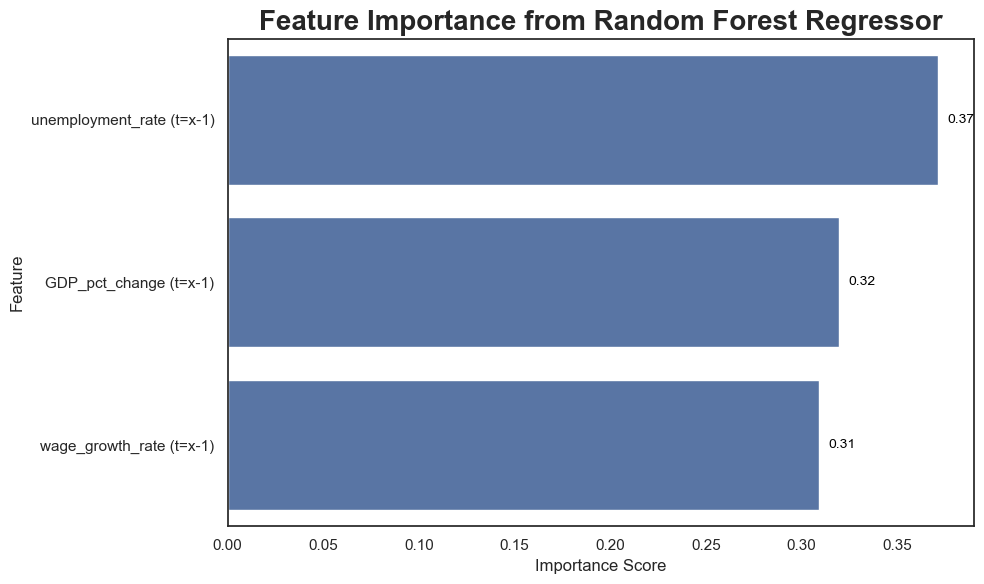

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'BoE_base_rate (t=x)',
        'unemployment_rate (t=x-1)',
        'GDP_pct_change (t=x-1)',
        'wage_growth_rate (t=x-1)'
       
    ]
)

# Define features and target
X = regression_df[
    [
        'unemployment_rate (t=x-1)',
        'GDP_pct_change (t=x-1)',
        'wage_growth_rate (t=x-1)'
       
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### unemployment_rate (t=x-1)	0.37	Most important feature — has the strongest influence on the predicted target.
### GDP_pct_change (t=x-1)	0.32	Also highly important, second strongest.
### wage_growth_rate (t=x-1)	0.31	Still significant, though slightly less than the others.

### Conclusion:

* All three features are important and contribute nearly equally, with unemployment rate having a slight edge.

* The Random Forest model is likely leveraging interactions and non-linearities among these predictors — a benefit over your earlier linear models.

* This supports the idea that a more flexible model better captures the complexity in your data compared to OLS regression.


Root Mean Squared Error: 0.1389
Mean Squared Error: 0.0193
Mean Absolute Error: 0.0697
R² Score: 0.9946


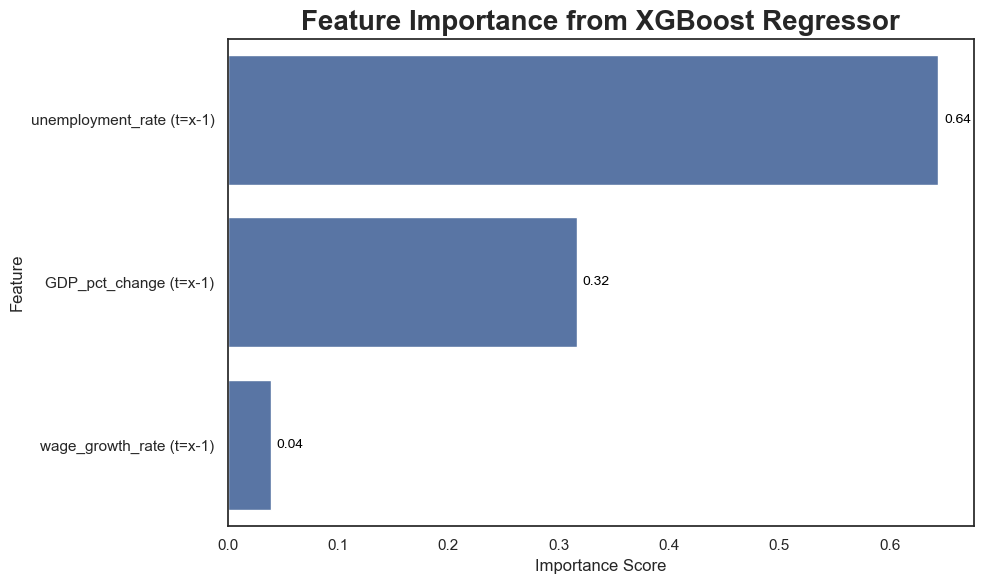

In [89]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=[
   'BoE_base_rate (t=x)',
        'unemployment_rate (t=x-1)',
        'GDP_pct_change (t=x-1)',
        'wage_growth_rate (t=x-1)'
])

# Features and target
X = regression_df[[
        'unemployment_rate (t=x-1)',
        'GDP_pct_change (t=x-1)',
        'wage_growth_rate (t=x-1)']]

y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Unemployment rate is by far the most critical input, contributing nearly two-thirds of the model's decision-making.

### GDP percentage change adds moderate value.

### Wage growth rate has very low influence — possibly because:

* It's collinear or redundant.

* It's weakly correlated with the target.

* Its effect is nonlinear or interacts with another variable in a way XGBoost doesn't capitalize on strongly.

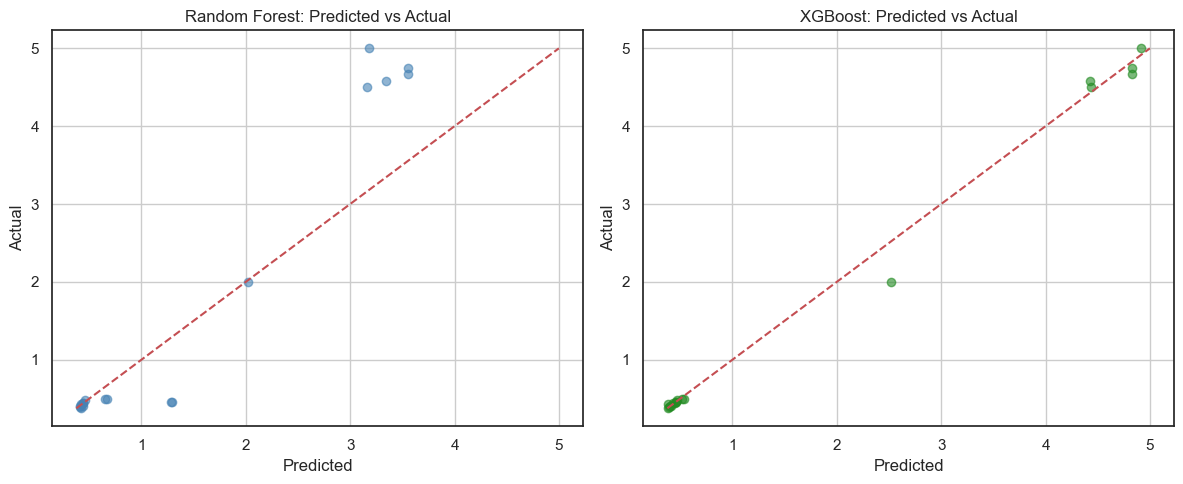

In [91]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### Random Forest (Left Plot):
* Many points deviate above the red dashed line (ideal line where prediction = actual), especially at higher values.

* Underestimates actual values in the upper range.

* Shows larger spread and less accuracy for higher target values.

###  XGBoost (Right Plot):
* Points are much closer to the diagonal, especially at the higher end.

* Better at capturing both low and high actual values.

* Less dispersion, indicating higher predictive accuracy.

### Conclusion:

### XGBoost clearly outperforms Random Forest in this case.

It captures the relationship more accurately, especially in extreme values (upper tail).

Likely benefits from its gradient boosting mechanism, which tends to reduce bias more effectively than Random Forest.